<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab09_prophet_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
date=pd.date_range('2020-01-05',periods=365)

In [4]:
date

DatetimeIndex(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03'],
              dtype='datetime64[ns]', length=365, freq='D')

In [6]:
len(date)

365

In [20]:
trend=np.log(np.arange(1,101,100/365))*22

In [21]:
len(trend)

365

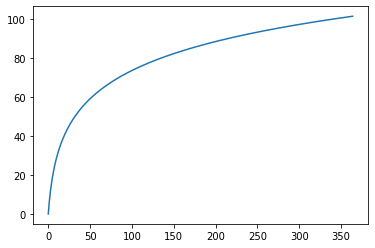

In [22]:
plt.plot(trend)

In [11]:
np.log(np.exp(1))

1.0

In [29]:
noise=np.random.randn(365)*5
len(noise)

365

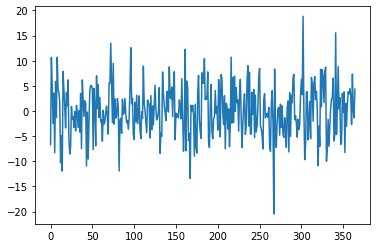

In [30]:
plt.plot(noise)

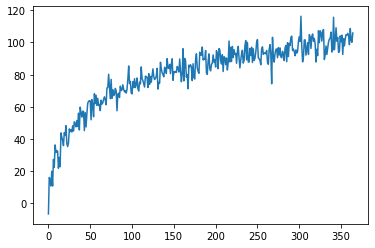

In [31]:
plt.plot(noise+trend)

In [32]:
week=np.array([10,1,2,4,6,8,9])

In [34]:
weekly=np.tile(week,53)

In [36]:
len(weekly)

371

In [37]:
weekly

array([10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,
        4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,
        9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,
        2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,
        8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,
        1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,
        6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9,
       10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,
        4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,
        9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,
        2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,
        8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,
        1,  2,  4,  6,  8,  9, 10,  1,  2,  4,  6,  8,  9, 10,  1,  2,  4,
        6,  8,  9, 10,  1

In [38]:
weekly=weekly[:365]

In [39]:
len(weekly)

365

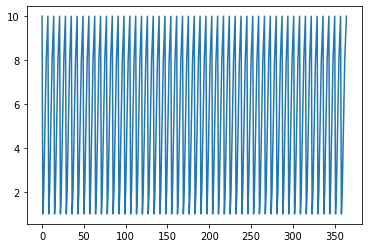

In [41]:
plt.plot(weekly)

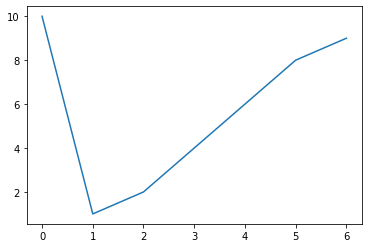

In [42]:
plt.plot(week)

In [57]:
month=np.sin(np.arange(0,2*np.pi,2*np.pi/30))*10+10

In [58]:
len(month)

30

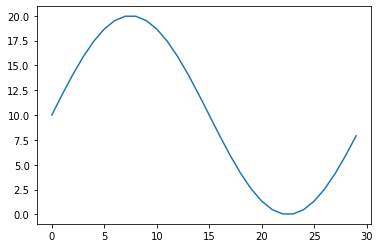

In [59]:
plt.plot(month)

In [60]:
monthly=np.tile(month,13)

In [61]:
len(monthly)

390

In [63]:
monthly=monthly[:365]

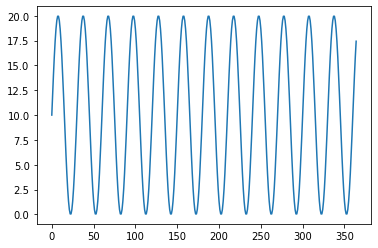

In [64]:
plt.plot(monthly)

In [70]:
reg=np.sin(np.arange(0,np.pi,np.pi/365))*30

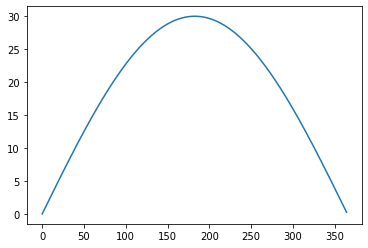

In [71]:
plt.plot(reg)

# 모델 생성

In [72]:
target=trend+noise+weekly+monthly+reg

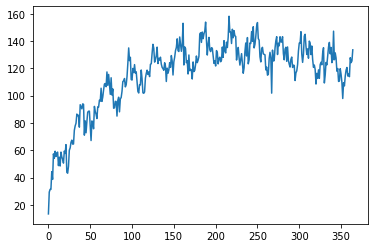

In [73]:
plt.plot(target)

In [74]:
data=pd.DataFrame()

In [78]:
data['date']=date
data['target']=target
data['trend']=trend
data['reg']=reg

In [80]:
data.head()

,date,target,trend,reg
0,2020-01-05,13.342576,0.000000,0.000000
1,2020-01-06,29.333679,5.327081,0.258210
2,2020-01-07,31.314422,9.612424,0.516401
3,2020-01-08,31.351793,13.197573,0.774553
4,2020-01-09,44.294677,16.279527,1.032648


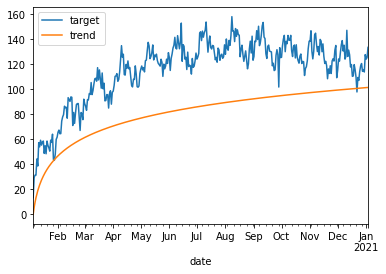

In [86]:
fig,ax=plt.subplots()
data.plot(x='date',y='target',ax=ax)
data.plot(x='date',y='trend',ax=ax)

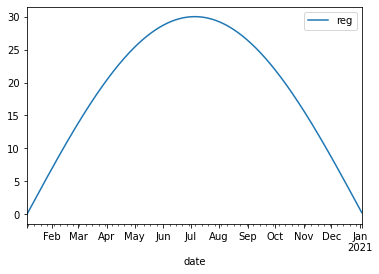

In [87]:
data.plot(x='date',y='reg')

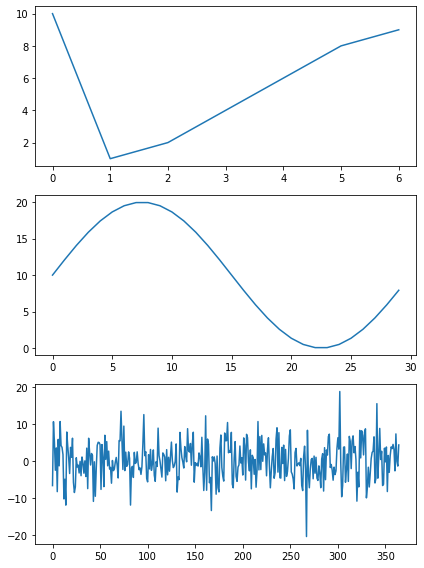

In [98]:
fig,ax=plt.subplots(nrows=3,figsize=(6,8))
ax[0].plot(week)
ax[1].plot(month)
ax[2].plot(noise)
plt.tight_layout()

#예측모델

In [99]:
from fbprophet import Prophet

In [103]:
data_train=data[['date','target']].rename(columns={'date':'ds','target':'y'})
data_train.head()

,ds,y
0,2020-01-05,13.342576
1,2020-01-06,29.333679
2,2020-01-07,31.314422
3,2020-01-08,31.351793
4,2020-01-09,44.294677


In [104]:
model1=Prophet()

In [105]:
model1.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [106]:
results1=model1.predict()

In [107]:
model1.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

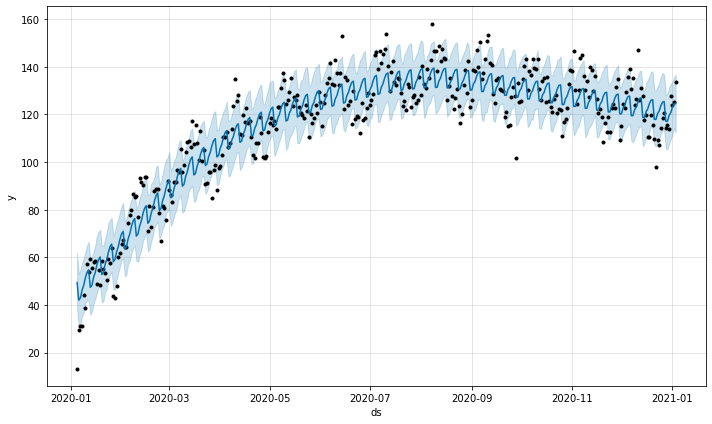

In [109]:
model1.plot(results1)
plt.show()

<function matplotlib.pyplot.show>

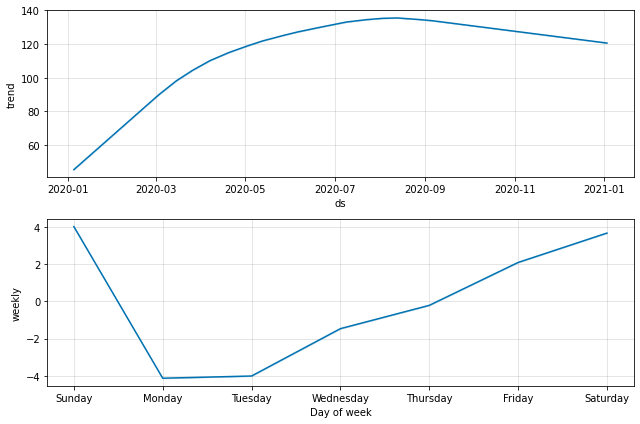

In [111]:
model1.plot_components(results1)
plt.show

In [112]:
future=model1.make_future_dataframe(periods=365)

In [113]:
future.head()

,ds
0,2020-01-05
1,2020-01-06
2,2020-01-07
3,2020-01-08
4,2020-01-09


In [114]:
future.tail()

,ds
725,2021-12-30
726,2021-12-31
727,2022-01-01
728,2022-01-02
729,2022-01-03


In [115]:
forcast1=model1.predict(future)

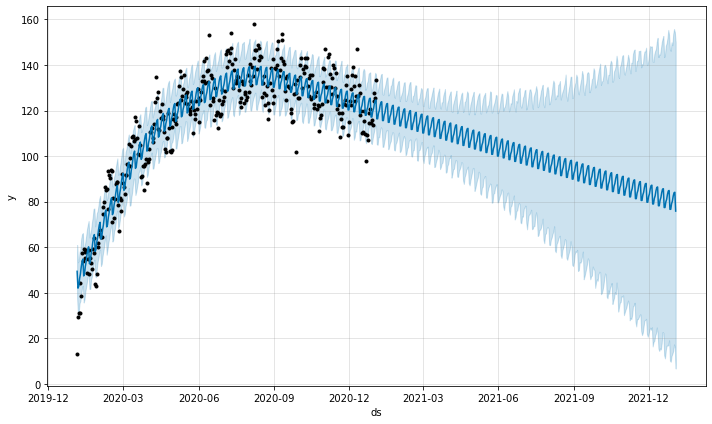

In [117]:
model1.plot(forcast1)
plt.show()

<function matplotlib.pyplot.show>

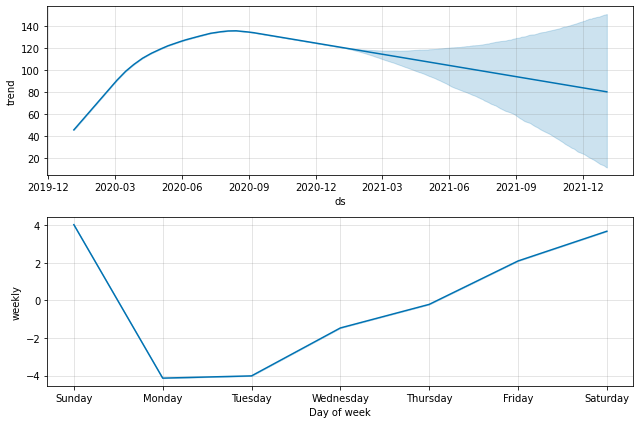

In [119]:
model1.plot_components(forcast1)
plt.show

In [120]:
model2=Prophet()

In [141]:
model2.add_seasonality(name='Monthly',period=30,fourier_order=3)

Exception: ignored

In [142]:
model2.fit(data_train)

Exception: ignored

In [ ]:
model2.seasonalities

In [ ]:
reusults2=model2.predict()

In [ ]:
model2.plot(reusults2)
plt.show

In [ ]:
model2.plot_components(reusults2)
plt.show

In [144]:
forcast2=model2.predict(future)

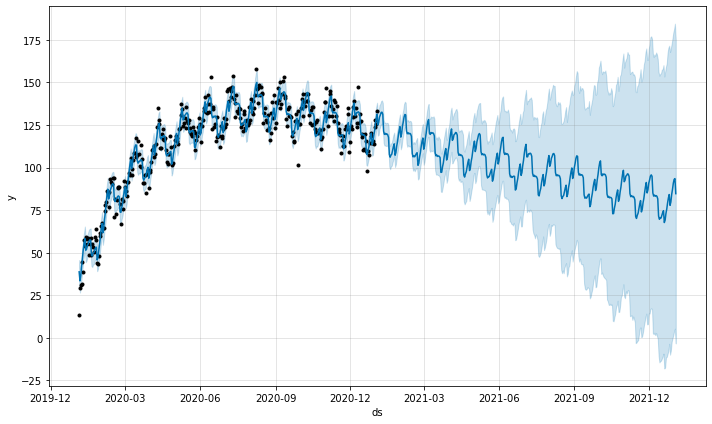

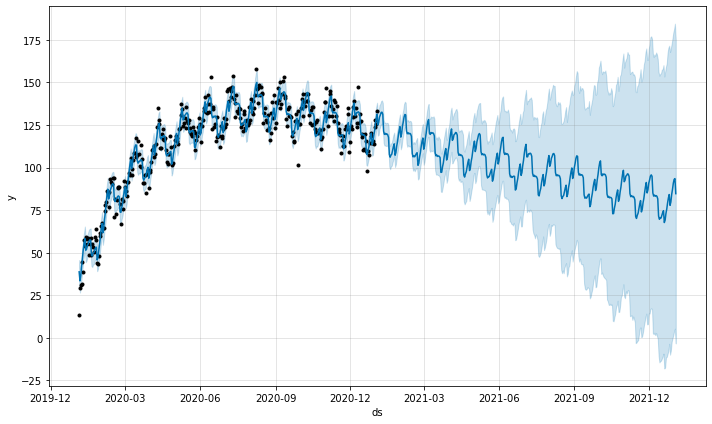

In [145]:
model2.plot(forcast2)

<function matplotlib.pyplot.show>

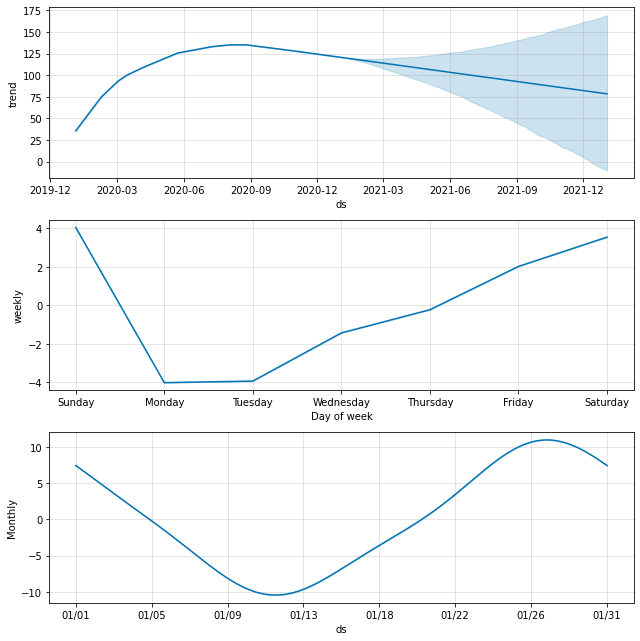

In [146]:
model2.plot_components(forcast2)
plt.show

In [147]:
data_train

,ds,y
0,2020-01-05,13.342576
1,2020-01-06,29.333679
2,2020-01-07,31.314422
3,2020-01-08,31.351793
4,2020-01-09,44.294677
...,...,...
360,2020-12-30,113.857468
361,2020-12-31,127.759310
362,2021-01-01,124.143113
363,2021-01-02,125.439286


In [148]:
data_train['reg']=data['reg']

In [149]:
data_train

,ds,y,reg
0,2020-01-05,13.342576,0.000000
1,2020-01-06,29.333679,0.258210
2,2020-01-07,31.314422,0.516401
3,2020-01-08,31.351793,0.774553
4,2020-01-09,44.294677,1.032648
...,...,...,...
360,2020-12-30,113.857468,1.290667
361,2020-12-31,127.759310,1.032648
362,2021-01-01,124.143113,0.774553
363,2021-01-02,125.439286,0.516401


In [150]:
model3=Prophet()

In [151]:
model3.add_seasonality(name='monthly',period=30,fourier_order=3)
model3.add_regressor(name='reg')

In [152]:
model3.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
results3=model3.predict()

<function matplotlib.pyplot.show>

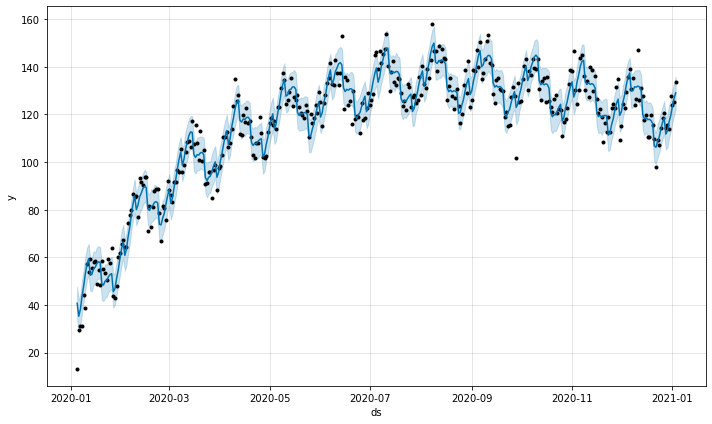

In [156]:
model3.plot(results3)
plt.show

<function matplotlib.pyplot.show>

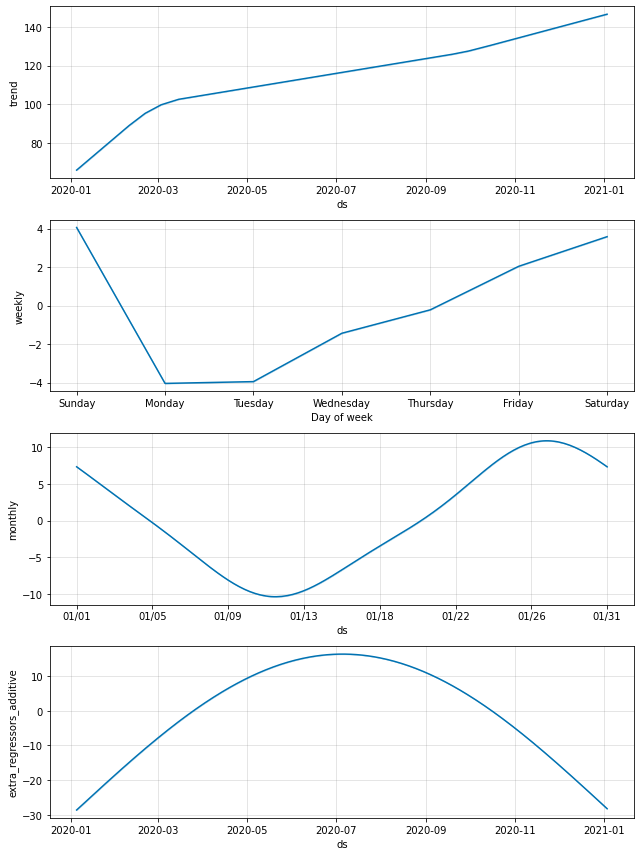

In [157]:
model3.plot_components(results3)
plt.show

In [160]:
future['reg']=pd.concat([data['reg'],data['reg']],axis=0,ignore_index=True)

In [161]:
future.head()

,ds,reg
0,2020-01-05,0.000000
1,2020-01-06,0.258210
2,2020-01-07,0.516401
3,2020-01-08,0.774553
4,2020-01-09,1.032648


In [164]:
forcast3=model3.predict(future)

<function matplotlib.pyplot.show>

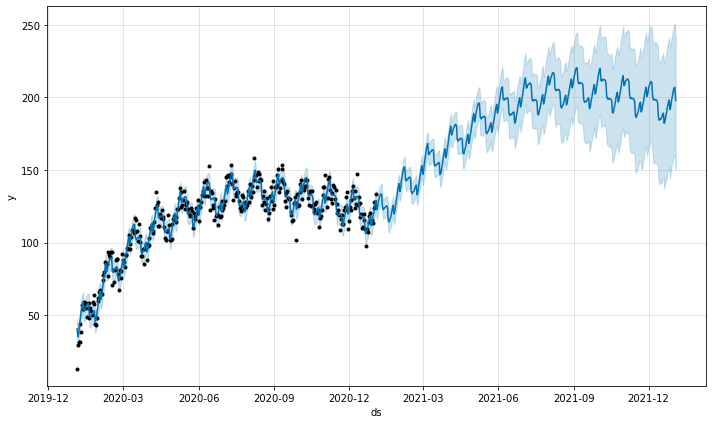

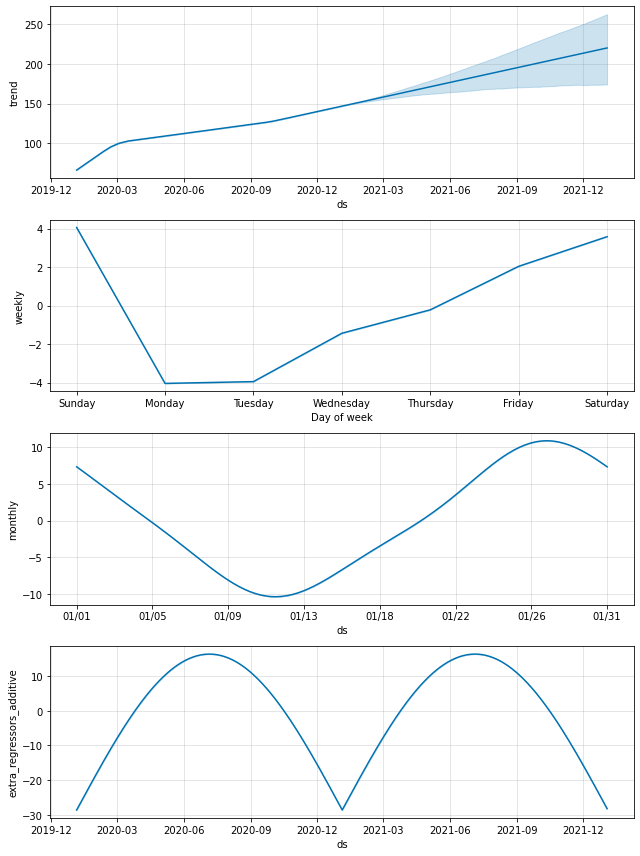

In [168]:
model3.plot(forcast3)
plt.show
model3.plot_components(forcast3)
plt.show